In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt # import MATLAB-like API 

Generate $A \in \mathbb{R}^{m \times n}$, $m$ data points $\in \mathbb{R^n}$, 
Let $m = 400$ et $n=2$. 

Each row $A$ represents a point in $\mathbb{R}^2$.

+ Draw each element of $A$ $\sim \mathcal{N}(0,1)$ 
+ Transform them applying a matrix $T$

In [6]:
m = 400
n = 2
T = np.array([[-1,1],
              [4,2]])
X = np.random.randn(m,n) 
A = np.dot(X,T)
A = A

In [7]:
A.shape

(400, 2)

Center the columns of $X$: $X_c = (X - \bar X)$, where $\bar X$ is the mean of $X$ along each column.

In [8]:
Ac = A-A.mean(axis=0)

$(1,0)\cdot T = T_{1,.}$ : The image of vector (1,0) is the first row of T (in red)

$(0,1)\cdot T = T_{2,.}$ : The image of vector (0,1) is the second row of T (in green)

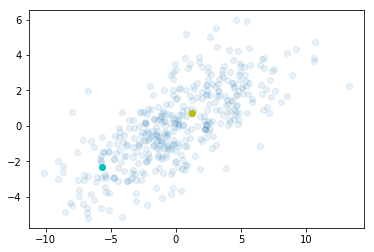

In [9]:
plt.plot(Ac[:,0],Ac[:,1],"o", alpha=0.1)
plt.plot(Ac[4,0],Ac[4,1],'yo') # tag an arbitrary point in yellow
plt.plot(Ac[101,0],Ac[101,1],'co') # tag an arbitrary point in cyan

#plt.quiver(*T[0,:], color="r",angles='xy', scale_units='xy', scale=1)
#plt.quiver(*T[1,:], color="g", angles='xy', scale_units='xy', scale=1)


# Apply the reduced SVD

$A = U \Sigma V^* \iff AV = U \Sigma$.

Hereafter $Vs = V^*$, and $s$ is a *vector*, with $\Sigma$ = diag(s).

In [10]:
U, s, Vs = np.linalg.svd(Ac, full_matrices=False)
V = Vs.T

In [11]:
U.shape,s.shape,Vs.shape

((400, 2), (2,), (2, 2))

Check the orthogonality of column vectors of $V$ and $U$

In [12]:
Vs.dot(V),U.T.dot(U)

(array([[1.00000000e+00, 3.13415377e-18],
        [3.13415377e-18, 1.00000000e+00]]),
 array([[1.00000000e+00, 1.21430643e-17],
        [1.21430643e-17, 1.00000000e+00]]))

### Represent A in the basis of $V$
Principal Components= $P = A_c V = U\Sigma$.

$P$ is $X_c$ in the basis of the column vectors of $V$.

$(1,0)\cdot V = V_{1,.}$ : The image of vector (1,0) is the first row of V (in green dashed)

$(0,1)\cdot V = V_{2,.}$ : The image of vector (0,1) is the second row of V (in red dashed)


In [13]:
P = np.dot(Ac,V)

In [14]:
# project cardinal vectors using V
I = np.eye(2)
axis_proj = I.dot(V)

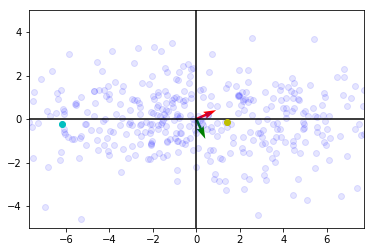

In [27]:
# plot P 
plt.axis('equal')
plt.axis([-5,5,-5,5])
plt.plot(P[:,0],P[:,1],'bo',alpha=0.1)
plt.plot(plt.array([-30,30]),plt.array([0, 0]),'k')
plt.plot(plt.array([0, 0]),plt.array([-30,30]),'k')
plt.plot(P[4,0],P[4,1],'yo') # X[1,:] tagué rouge 
plt.plot(P[101,0],P[101,1],'co') # X[8,:] tagué cyan 
# Plot axis
plt.quiver(*axis_proj[0,:],color="r",angles='xy', scale_units='xy', scale=1)
plt.quiver(*axis_proj[1,:],color="g",angles='xy', scale_units='xy', scale=1)

### Represent $A$ and the vectors of $V$ in the cardinal basis

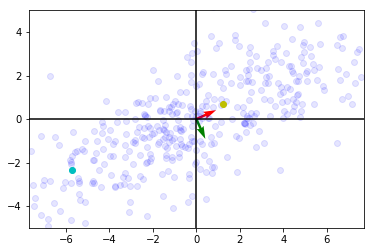

In [28]:
# Plot A
plt.plot(Ac[:,0],Ac[:,1],'bo',alpha=0.1)
plt.plot(plt.array([-30,30]),plt.array([0, 0]),'k')
plt.plot(plt.array([0, 0]),plt.array([-30,30]),'k')
plt.plot(Ac[4,0],Ac[4,1],'yo') # X[1,:] tagué rouge 
plt.plot(Ac[101,0],Ac[101,1],'co') # X[8,:] tagué cyan 
plt.axis('equal')
plt.axis([-5,5,-5,5])
# Plot the vectors $V$ in the cardinal basis
plt.quiver(*V[:,0],color="r",angles='xy', scale_units='xy', scale=1)
plt.quiver(*V[:,1],color="g",angles='xy', scale_units='xy', scale=1)


### Represent $P=U\Sigma$

In [19]:
P_ = U.dot(np.eye(2)*s)

[-5, 5, -5, 5]

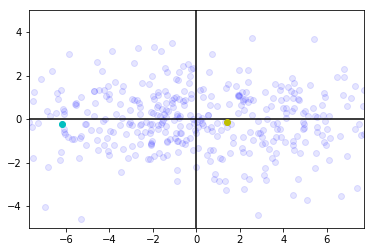

In [20]:
plt.plot(P_[:,0],P_[:,1],"bo",alpha=0.1)
plt.plot(plt.array([-30,30]),plt.array([0, 0]),'k')
plt.plot(plt.array([0, 0]),plt.array([-30,30]),'k')
plt.plot(P_[4,0],P_[4,1],'yo') # X[1,:] tagué rouge 
plt.plot(P_[101,0],P_[101,1],'co') # X[8,:] tagué cyan 
plt.axis('equal')
plt.axis([-5,5,-5,5])

### Represent U

[-0.2, 0.2, -0.2, 0.2]

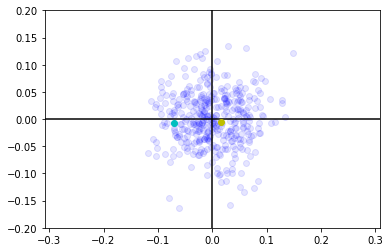

In [25]:
plt.plot(U[:,0],U[:,1],"bo",alpha=0.1)
plt.plot(plt.array([-30,30]),plt.array([0, 0]),'k')
plt.plot(plt.array([0, 0]),plt.array([-30,30]),'k')
plt.plot(U[4,0],U[4,1],'yo') # X[1,:] tagué rouge 
plt.plot(U[101,0],U[101,1],'co') # X[8,:] tagué cyan 
plt.axis('equal')
plt.axis([-0.2,0.2,-0.2,0.2])

# Singular Values

Les singular values $\sigma_1$ et $\sigma_2$ are the sqrt of the eigenvalues of the matrix $C = A^* A$. 

The coefficients $(i,j)$ of the matrix $C$ are the scalar products $(X_i-\bar X)^*(X_j - \bar X_j)$, with $X_i$ the i-th column of $X$ and $\bar X_i$ the mean value along column $i$. 

So $C_{i,j}/(N-1)$ is the covariance matrix. 


the singular values of $X_c$, are the srqt of the eigenvalues of $C$, and are thus proportional to the stds ($\times \sqrt{N-1}$.

In [85]:
np.linalg.eig(Ac.T.dot(Ac))[0],s**2

(array([8594.87255078,  714.76194089]), array([8594.87255078,  714.76194089]))

In [114]:
len1 = s[0]*2/np.sqrt(m-1) # 2 écarts types le long du semi-axe u1
len2 = s[1]*2/np.sqrt(m-1) # 2 écarts types le long du semi-axe u2